<a href="https://colab.research.google.com/github/fnsalamaa/Machine-Learning/blob/main/Machine_Learning_Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**✩˚｡⋆ WEEK 7 MACHINE LEARNING ✩˚｡⋆**
## Name : Fina Salama Qowlam Hareny
### No  : 08 / 2141720164
### Class : TI-3I

----
###**⋰˚☆LAB WORK 1⋰˚☆**
###**K-Means Clustering**

**Intro**

K-Means is a method of unsupervised learning in machine learning. This method determines the number of clusters based on the chosen number. The manual process of K-Means can be seen in the following link,

In this module's hands-on exercise, we will directly practice creating a K-Means model using Python. For the first module, we will use a simple case study, which involves the use of the iris dataset. In the second module, we will perform more advanced clustering, specifically color reduction with image data.

####**Step 1 - Preparation**

In [ ]:
# Import Necessary Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

####**Step 1.2 - Data Preparation**

In [ ]:
# a. Upload Data
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
# b. Load data
df = pd.read_csv('Iris.csv')

# Displays the first few rows of the dataframe
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


####**Step 2 - Select Features and Label**

In [ ]:
# Select Features
X = df.iloc[:, 1:-1] # slice features vector
y = df.iloc[:, -1] # slice data labels

####**Step 3 - Visualize The Data**

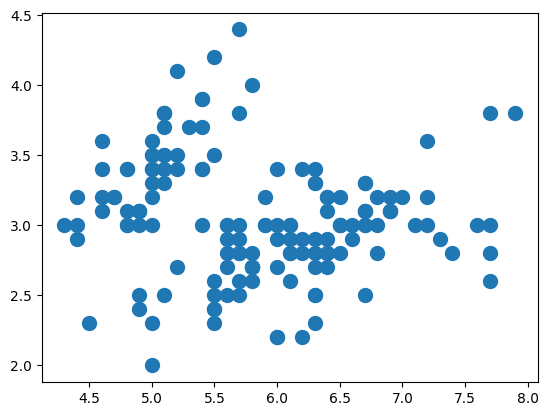

In [ ]:
# Plot Data
# We have 4 dimensional feature space
# Thereofe, we only plot the cluster based on Sepal Length and Sepal Width only

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

####**Step 4 - Make K-Means Model**

In [ ]:
# Create K-Means Model
# In this model, we only just create a model with k = 2 even we already know the total of Iris dataset label is 3.

from sklearn.cluster import KMeans

# Instantiation K-Means Model
cl_kmeans = KMeans(n_clusters=2)

# Fit and predict
y_kmeans = cl_kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


####**Step 5 - Check Cluster**

This code shows you how to check the cluster created by K-Means model that we create before.

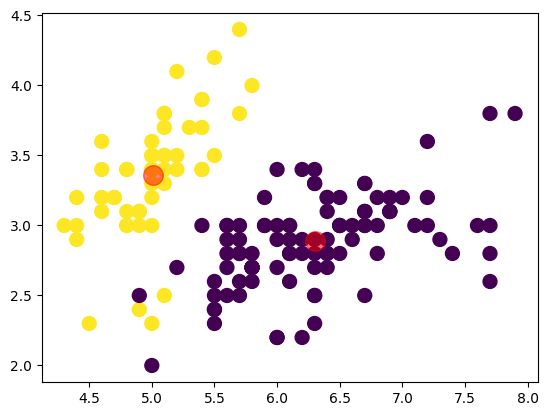

In [ ]:
# Plot cluster based on Sepal Length and Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

####**Step 6 - Evaluate Model**

In this work, we will evaluate our K-Means model using "Sum of Sequare Error" (SSE).

In [ ]:
# Check the value of SSE
print(f'SSE: {cl_kmeans.inertia_}')

SSE: 152.36870647733906


####**Step 7 - Find The Optimum K**

In this code, we try to implement elbow method to find the optimum value of k in our dataset.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

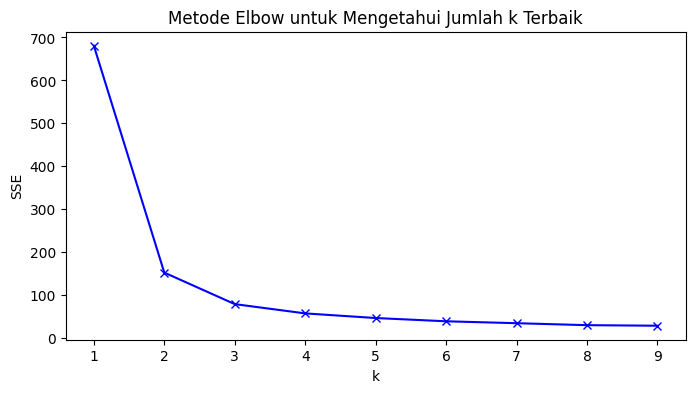

In [ ]:
# Implementasi Metode Elbow

# The of SSE's values
sse = []

# Limit finding the best k from 1-10
K = range(1,10)

# Calculate SSE for each k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [ ]:
# Check SSE value for each k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8244000000001
k=2; SSE=152.36870647733906
k=3; SSE=78.940841426146
k=4; SSE=57.317873214285704
k=5; SSE=46.53558205128205
k=6; SSE=38.93873974358975
k=7; SSE=34.49095451505018
k=8; SSE=29.905374299825105
k=9; SSE=28.61501223776224


----
###**⋰˚☆LAB WORK 2⋰˚☆**
###**Clustering on Unstructured Data**

###**Case 1: Numerical Images**

In this work, you will try to cluster numerical images based on their characteristic. However, even this work using K-Means as the model, the entire process will be evaluated using classification metric named accuracy.

####**Step 1 - Load Data**

In this code, we try to download the digits data. It may takes several minutes to complete.

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

####**Step 2 - Make K-Means Model**

We will create 10 cluster based on number of digits (1-10). Therefore, in the n_clusters  we set is as 10.

In [ ]:
# Create K-Means model
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(10, 64)

####**Step 3 - Plot Digits Cluster**

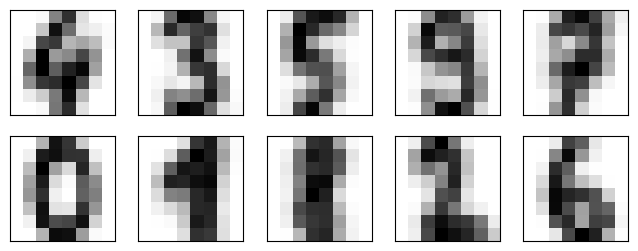

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

####**Step 4 - Labeling Based on The Cluster**

In this code, we will create a label for each cluster. Please take a notes, in this code, we still rely on digits labels that we get from dataset.

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

####**Step 5 - Evaluate Based Using Accuract Metric**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

**Check the confusion matrix result,**

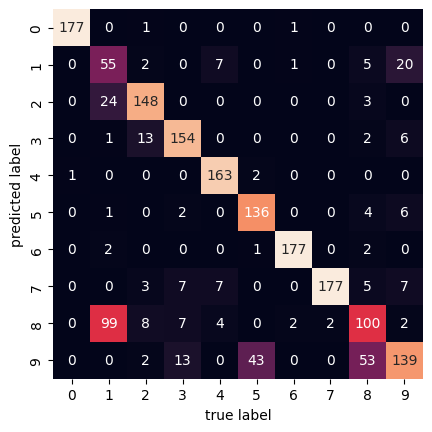

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

###**Case 2: Image Compression**
Clustering also can be use in image compression scenario. In this case, we will replace surrounding pixel value using similar value based on their cluster.

####**Step 1 - Load Data**


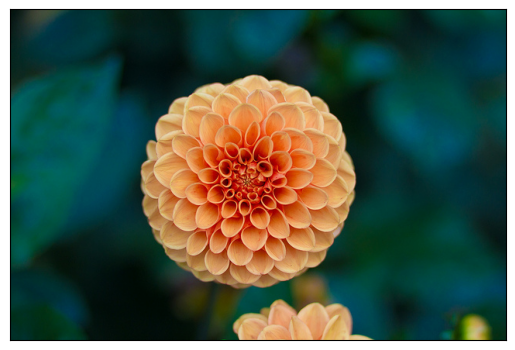

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)

In [ ]:
# Check the shape of the image
image_shape = flower.shape

print("Image Shape:", image_shape)

Image Shape: (427, 640, 3)


####**Step 2 - Normalize The Pixel Value**

In this code, we will make the value of pixel to 0-1 by divided with 255.

In [ ]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

This indicates that the data array has 273,280 rows (pixels) and 3 columns (RGB channels). Each row contains the normalized RGB values of a pixel from the original 427×640 image.

####**Step 3 - Plot The Pixel Distribution**

Plot the pixel value distribution based on 3 channel, red, green, and blue.

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

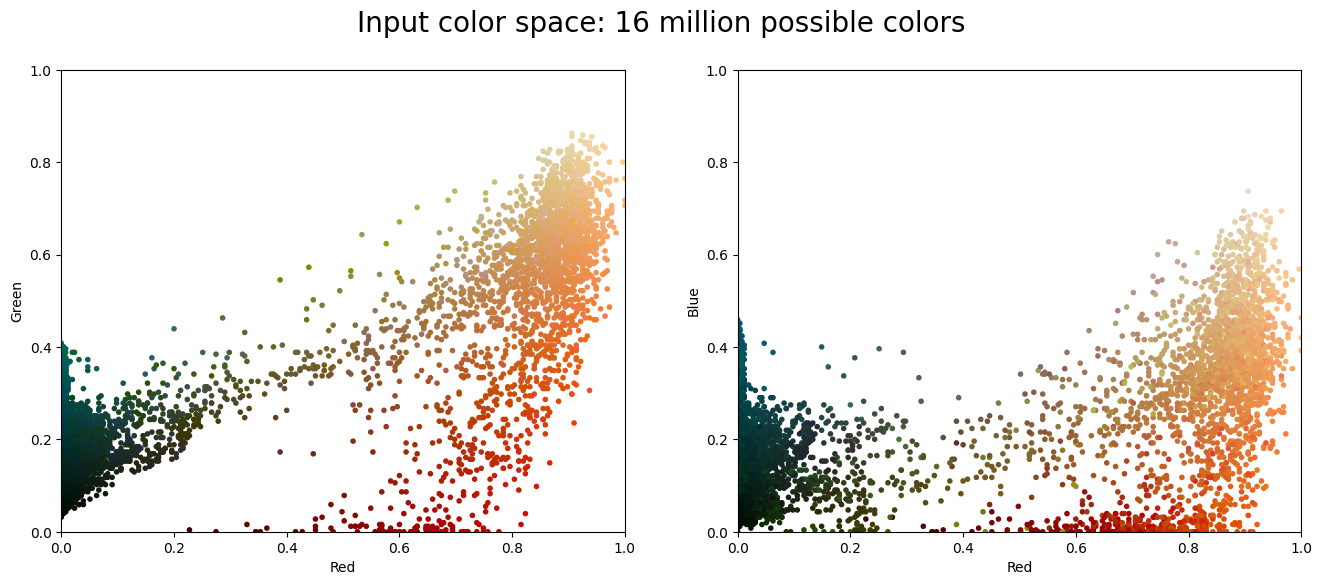

In [ ]:
# Call the function,
plot_pixels(data, title='Input color space: 16 million possible colors')

####**Step 4 - Make K-Means Model**

In this case, we will use special type of K-Means named MiniBatchKmeans. Mini batch mean, we will create a cluster based on several mini batch of data. Moreover, this process also compress the image to 16 color only, thus, the number of cluster is 16.

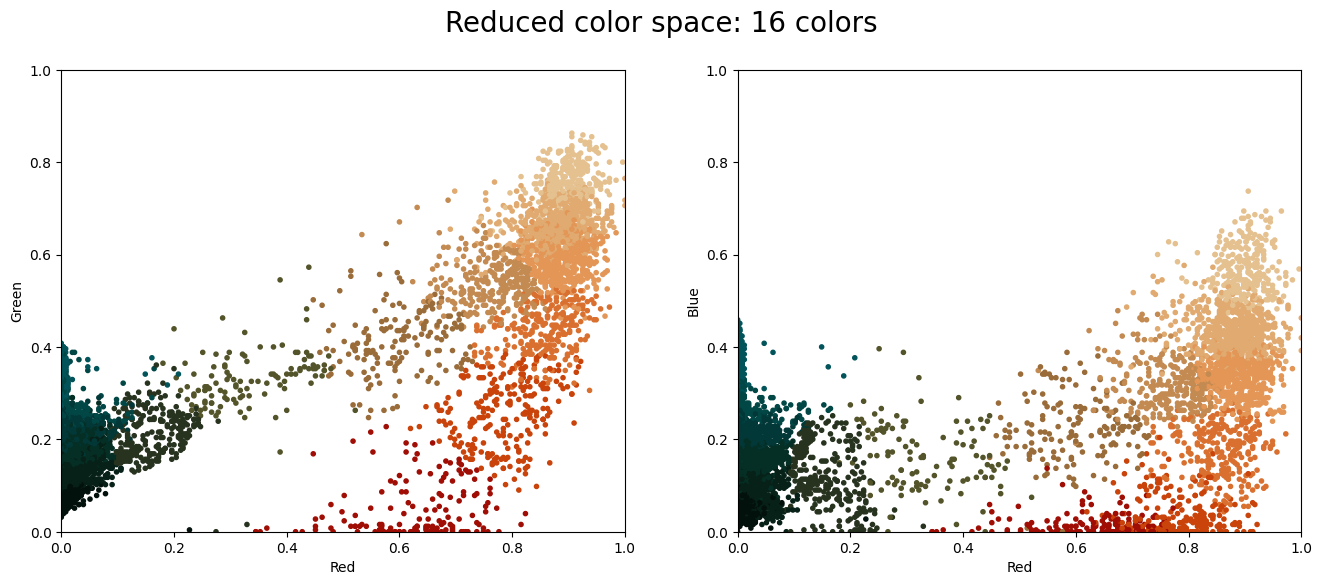

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

####**Step 5 - Visualize The Result**


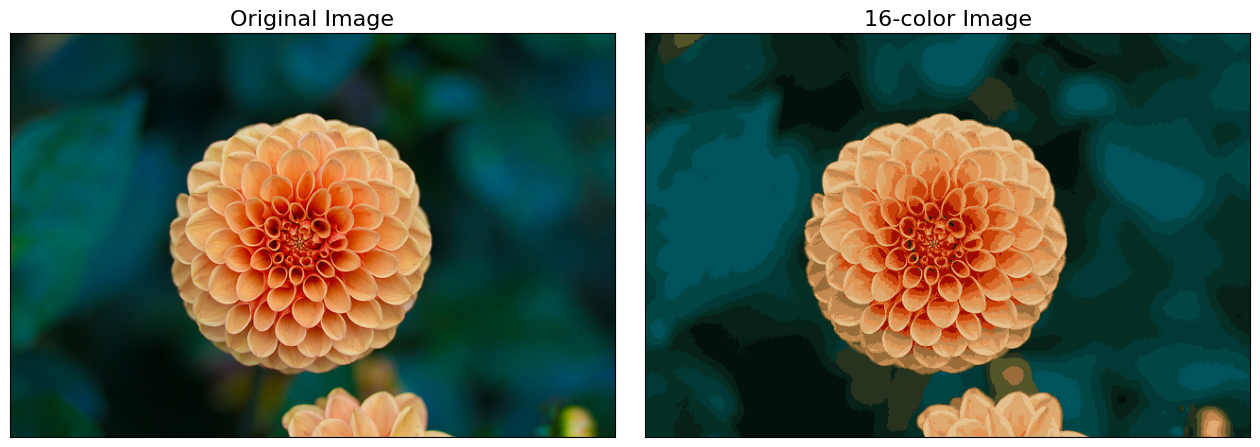

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

----
###**⋰˚☆LAB WORK 3⋰˚☆**
###**Self-Organizing Map (SOM)**

**Intro**

An example of applying Self-Organizing Map (SOM) for clustering using the SOMPY library. Before you begin, make sure you have installed the SOMPY library. If SOMPY is not found in the library, you can use MiniSom. In this lab, we will use the MiniSom library for implementing SOM with a smaller size.

####**Step 0 - Install Minisom**


In [ ]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=06d7336ca9f1b9786271c679cb2c89fc186e78815910c56038cd7744846cb73d
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


####**Step 1 - Import Library**


In [ ]:
# Import Necessary Library
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

####**Step 2 - Load Iris Dataset**


In [ ]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

####**Step 3 - Normalize Data**


In [ ]:
# Normalize Data
data = data / data.max(axis=0)

####**Step 4 - Make SOM Model**

We are going to use 10x10 architecture.

In [ ]:
# Initiate SOM Model
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

####**Step 4.1 - Initiatie Random Weight for SOM**


In [ ]:
# Initiate random weight
som.random_weights_init(data)

####**Step 4.2 - Fit Model**


In [ ]:
# Fit SOM
num_epochs = 100
som.train_random(data, num_epochs)

####**Step 5 - Visualize SOM Network**

Using the trained map for visualization. In this work, we will display the map with colors and mark the winners for each sample.

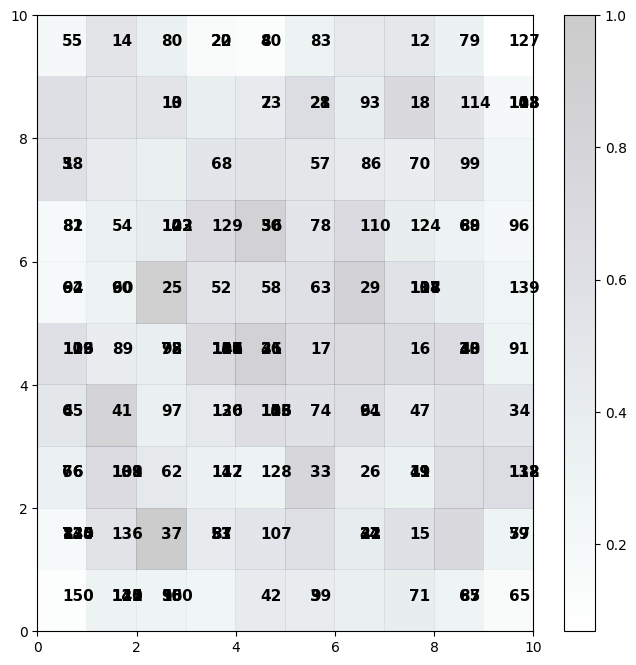

In [ ]:
# SOM Visualization
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()

----
##**⋰˚☆Lab Assigment⋰˚☆**

###**Task**

**Create a K-Means model with the following conditions:**

###**1.Use the 'Mall_Customers.csv' data.**

####**Step 1 - Preparation**

In [1]:
# Import Necessary Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

####**Step 1.2 - Data Preparation**

In [3]:
# a. Upload Data
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
# b. Load data
df = pd.read_csv('Mall_Customers.csv')

# Displays the first few rows of the dataframe
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# c. Print a concise summary of a DataFrame.
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

###**2. Determine the appropriate features for clustering (at least 2).**

**Select Features**

In [ ]:
# Features used -> Annual Income (k$), Spending Score (1-100)
features = df.iloc[:,3:5]

In [ ]:
features.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


**Visualize The Data**

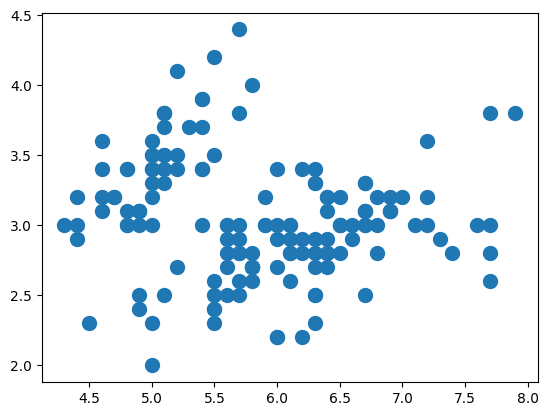

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

**Finding the Best Number of Clusters Using the Elbow Method**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

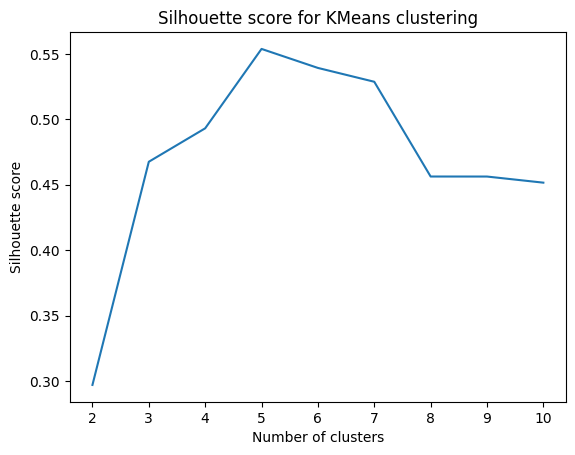

In [ ]:
# Create a list of cluster numbers
cluster_numbers = list(range(2, 11))

# Calculate the silhouette scores for each number of clusters
silhouette_scores = []
for cluster_number in cluster_numbers:
    kmeans = KMeans(n_clusters=cluster_number)
    kmeans.fit(features)
    silhouette_scores.append(silhouette_score(features, kmeans.labels_))

# Plot the silhouette scores against the number of clusters
plt.plot(cluster_numbers, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score for KMeans clustering')
plt.show()

###**3. Create a K-Means model considering the best number of clusters.**